In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as c
from scipy.optimize import fsolve

# Problem 1a

In [2]:
def cooling_CII(T, n_CII=0.1, **kwargs):
    lambda_H = n_CII * 5.2 * (T/(100*u.K))**0.13 * np.exp(-91.2*u.K/T)
    lambda_e = n_CII * 3.1 * (T/(100*u.K))**0.13 * np.exp(-91.2*u.K/T)
    return (lambda_H + lambda_e)  * 1e-27 * u.erg * u.cm**3 * u.s**-1

def cooling_OI(T, n_OI=0.1, **kwargs):
    return n_OI * 4.1 * (T/(100*u.K))**0.42 * np.exp(-228*u.K/T) * 1e-27 * u.erg * u.cm**3 * u.s**-1

def cooling_lya(T, **kwargs):
    return 6e5 * (T/(100*u.K))**-0.5 * np.exp(-1.18e5*u.K/T) * 1e-27 * u.erg * u.cm**3 * u.s**-1

def cooling(T, **kwargs):
    return cooling_CII(T, **kwargs) + cooling_OI(T, **kwargs) + cooling_lya(T, **kwargs)

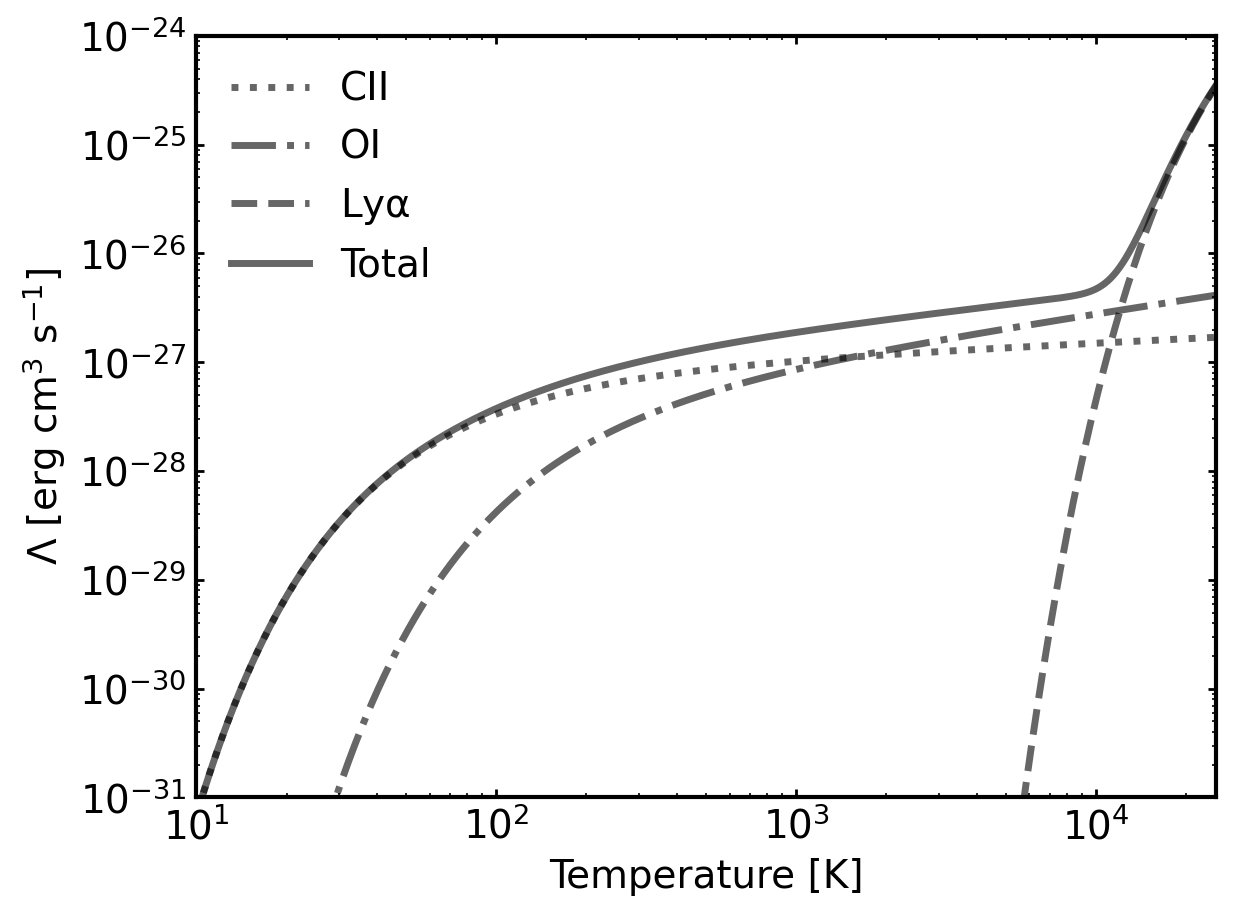

In [3]:
fig, ax = plt.subplots()

Ts = np.logspace(0, 5, 1000)*u.K

mpl_kwargs = dict(color="k", alpha=0.6)

ax.plot(Ts, cooling_CII(Ts), linestyle=":", label="CII", **mpl_kwargs)
ax.plot(Ts, cooling_OI(Ts), linestyle="-.", label="OI", **mpl_kwargs)
ax.plot(Ts, cooling_lya(Ts), linestyle="--", label=r"Ly$\alpha$", **mpl_kwargs)
ax.plot(Ts, cooling(Ts), linestyle="-", label="Total", **mpl_kwargs)


ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylim(1e-31, 1e-24)
ax.set_xlim(1e1, 10**4.4)

ax.set_ylabel(r"$\Lambda$ [erg cm$^3$ s$^{-1}$]")
ax.set_xlabel("Temperature [K]")

ax.legend();

fig.savefig("cooling_function.png")

# Problem 1b"

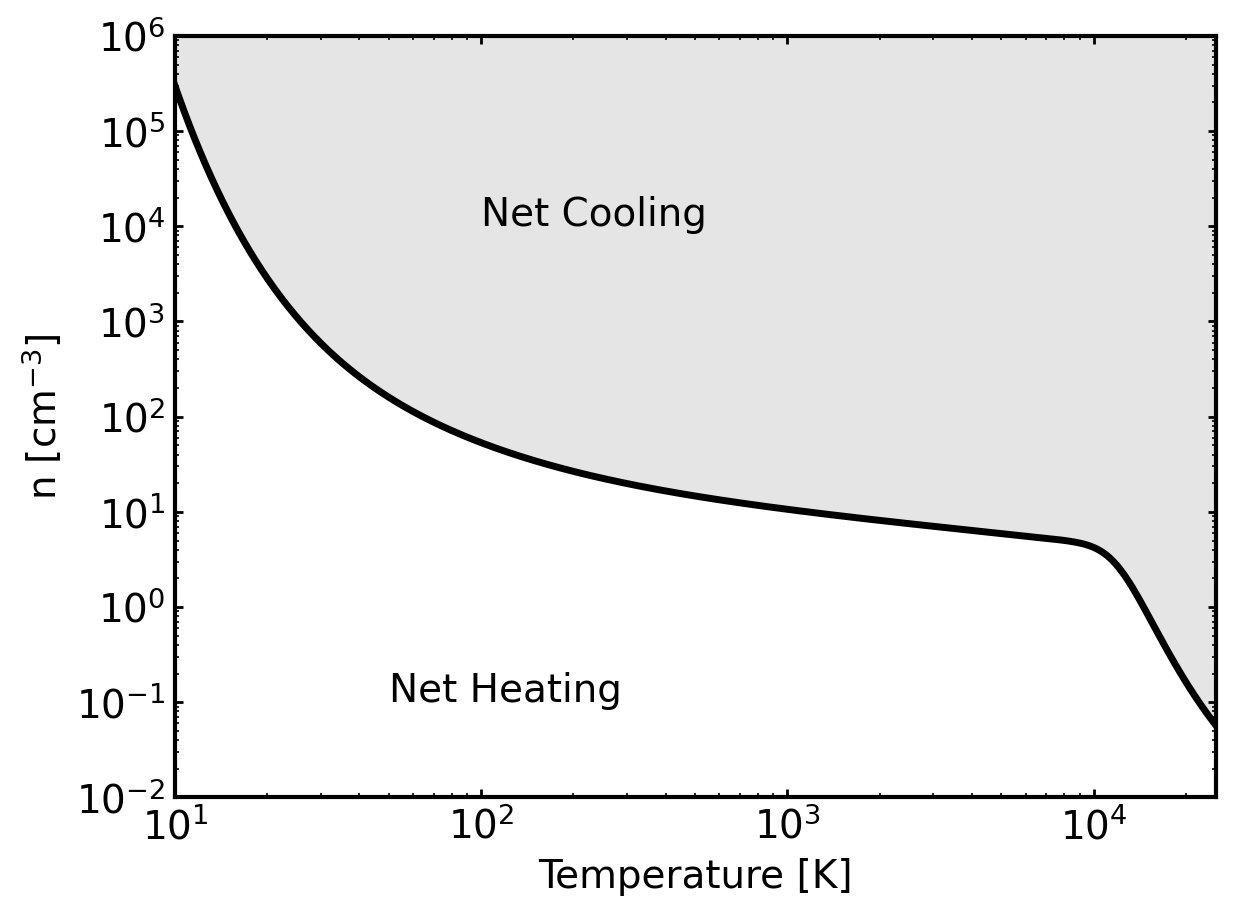

In [4]:
def n_eq(T, G=2e-26*u.erg/u.s, **kwargs):
    lambda_tot = cooling(T, **kwargs)
    return G/lambda_tot

fig, ax = plt.subplots()

Ts = np.logspace(0, 4.4, 1000)*u.K

ax.plot(Ts, n_eq(Ts), 'k-')

ax.fill_between(Ts.value, n_eq(Ts).value, np.ones(len(Ts))*1e10, color='k', alpha=0.1, edgecolor="none")

ax.set_xlim(1e1, 10**4.4)
ax.set_ylim(1e-2, 1e6)

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylabel(r"n [cm$^{-3}$]")
ax.set_xlabel("Temperature [K]")

ax.text(1e2, 1e4, "Net Cooling")
ax.text(5e1, 1e-1, "Net Heating")

fig.savefig("n_vs_T.png")

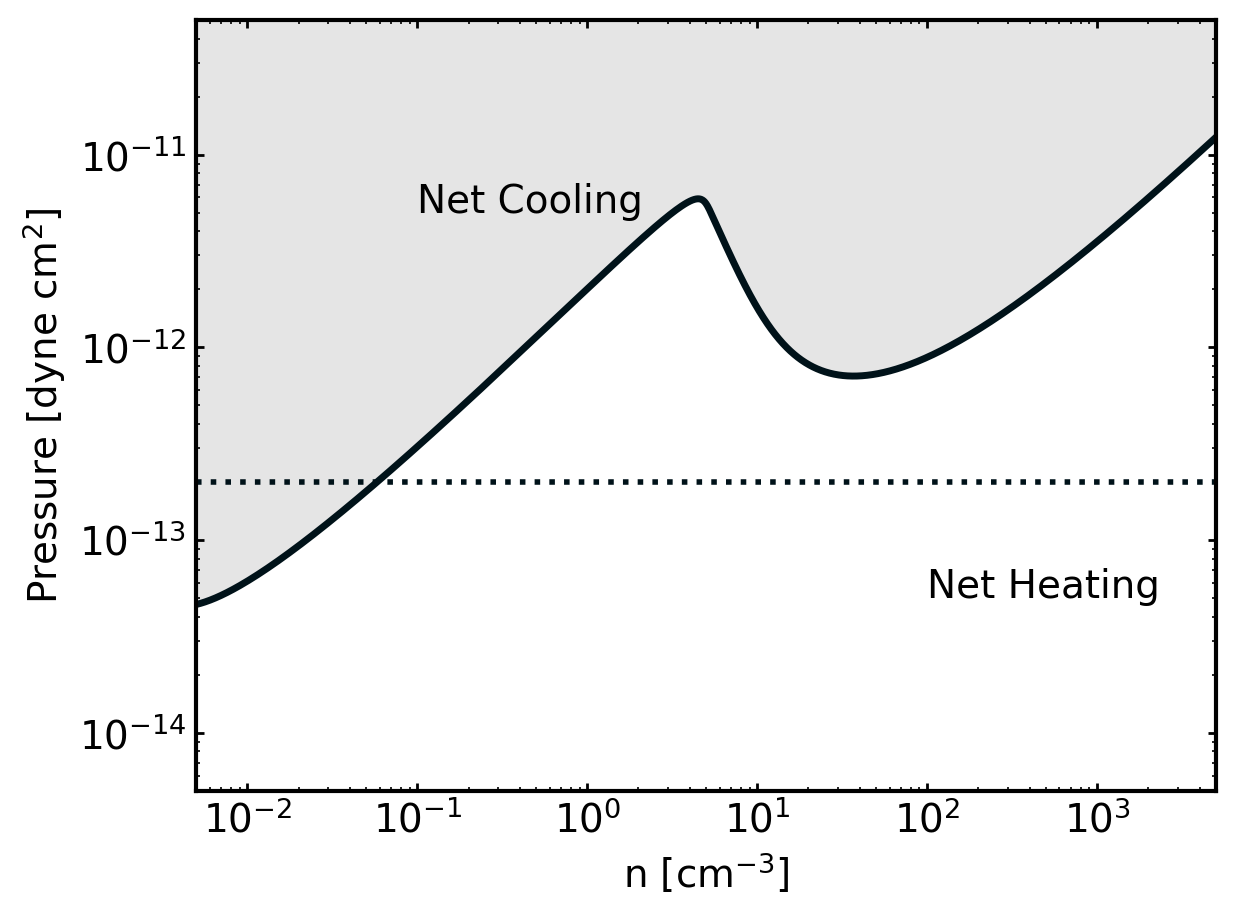

In [5]:
def P_ideal(T):
    n = n_eq(T) 
    return n*c.k_B*T

def P_to_solve(T, P_ism=2e-13*u.dyne/u.cm**2):
    return (P_ideal(T*u.K) - P_ism).to(u.dyne/u.cm**2).value

Ts = np.logspace(1, 5, 1000)*u.K
n_eqs = n_eq(Ts).cgs
P = P_ideal(Ts).to(u.dyne/u.cm**2)

P_ism = 2e-13*u.dyne*u.cm**-2

fig, ax = plt.subplots()

ax.plot(n_eqs, P)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(5e-3, 5e3)
ax.set_ylim(5e-15, 5e-11)

ax.fill_between(n_eqs.value, P.value, np.ones(len(Ts))*1e-9, color='k', alpha=0.1, edgecolor="none")

ax.axhline(2e-13, linestyle=":", linewidth=2)

ax.text(1e-1, 5e-12, "Net Cooling")
ax.text(1e2, 5e-14, "Net Heating")

ax.set_ylabel(r"Pressure [dyne cm$^{2}$]")
ax.set_xlabel(r"n [cm$^{-3}$]")

fig.savefig("P_vs_n.png")

# Problem 2a

In [6]:
def a(gamma_ul, nu, b=10*u.km/u.s):
    return gamma_ul * c.c / (4*np.pi*nu*b)

def do_2a(As, ll):
    
    nu = c.c/ll
    print(r"$\nu_{ul}$ = ", f"{nu.to(u.Hz):.2e}")
    
    gamma_ul = sum(As)
    print(r"$\gamma_{ul}$ = ", f"{gamma_ul:.2e}")
    
    a_coeff = a(gamma_ul, nu)
    print(f"a = {a_coeff.cgs:.2e}")

# some constants from NIST
A_21 = 4.6986e8*u.s**-1
A_32 = 4.4101e7*u.s**-1
A_31 = 5.5751e7*u.s**-1
A_43 = 8.9860e6*u.s**-1
A_42 = 8.4193e6*u.s**-1
A_41 = 1.2785e7*u.s**-1

lambda_21 = 121.57 * u.nm
lambda_31 = 102.57 * u.nm
lambda_41 = 97.254 * u.nm

# Ly alpha
print(r"Ly$\alpha$")
do_2a([A_21], lambda_21)

print()
print(r"Ly$\beta$")
do_2a([A_32, A_31], lambda_31)

print()
print(r"Ly$\gamma$")
do_2a([A_43, A_42, A_41], lambda_41)

Ly$\alpha$
$\nu_{ul}$ =  2.47e+15 Hz
$\gamma_{ul}$ =  4.70e+08 1 / s
a = 4.55e-04

Ly$\beta$
$\nu_{ul}$ =  2.92e+15 Hz
$\gamma_{ul}$ =  9.99e+07 1 / s
a = 8.15e-05

Ly$\gamma$
$\nu_{ul}$ =  3.08e+15 Hz
$\gamma_{ul}$ =  3.02e+07 1 / s
a = 2.34e-05


# Problem 2b

In [7]:
N_HI = 3e19 * u.cm**-2
n_D_over_n_HI = 2e-5
b = 10 * u.km/u.s

N_l = N_HI * (n_D_over_n_HI)

def tau0_prefactor(nu_ul, N_l, A_ul, b=b):
    return 1/(4*np.pi)**(3/2) * (c.c**2 / nu_ul**3) * c.c/b * A_ul * N_l

def tau0(nu_ul, N_l, A_ul, g_ratio, b=b):
    return g_ratio * tau0_prefactor(nu_ul, N_l, A_ul, b=b)

A_21 = 4.6986e8*u.s**-1
A_32 = 4.4101e7*u.s**-1
A_31 = 5.5751e7*u.s**-1
A_43 = 8.9860e6*u.s**-1
A_42 = 8.4193e6*u.s**-1
A_41 = 1.2785e7*u.s**-1

nu_21 = (c.c/(121.53 * u.nm)).to(u.Hz)
nu_31 = (c.c/(102.54 * u.nm)).to(u.Hz)
nu_41 = (c.c/(97.227 * u.nm)).to(u.Hz)

print(f"{nu_21:.2e}")
print(f"{nu_31:.2e}")
print(f"{nu_41:.2e}")
print()
print(tau0_prefactor(nu_21, N_l, A_21).cgs)
print(tau0_prefactor(nu_31, N_l, A_31).cgs)
print(tau0_prefactor(nu_41, N_l, A_41).cgs)
print()
print(tau0(nu_21, N_l, A_21, 8/2).cgs)
print(tau0(nu_31, N_l, A_31, 18/2).cgs)
print(tau0(nu_41, N_l, A_41, 32/2).cgs)

2.47e+15 Hz
2.92e+15 Hz
3.08e+15 Hz

11.359400777642879
0.809597307866279
0.1582697233773755

45.437603110571516
7.2863757707965116
2.532315574038008


# Problem 2c

In [8]:
# for hydrogen
nu_21_D = (c.c/(121.57 * u.nm)).to(u.Hz)
nu_31_D = (c.c/(102.57 * u.nm)).to(u.Hz)
nu_41_D = (c.c/(97.254 * u.nm)).to(u.Hz)

N_l = N_HI
tau0_a_H = tau0(nu_21, N_l, A_21, 8/2).cgs
tau0_b_H = tau0(nu_31, N_l, A_31, 18/2).cgs
tau0_y_H = tau0(nu_41, N_l, A_41, 32/2).cgs

print("Hydrogen")
print(tau0_a_H)
print(tau0_b_H)
print(tau0_y_H)

# for deuterium
nu_21_D = (c.c/(121.53 * u.nm)).to(u.Hz)
nu_31_D = (c.c/(102.54 * u.nm)).to(u.Hz)
nu_41_D = (c.c/(97.227 * u.nm)).to(u.Hz)

N_l = N_HI * n_D_over_n_HI
tau0_a_D = tau0(nu_21_D, N_l, A_21, 8/2).cgs
tau0_b_D = tau0(nu_31_D, N_l, A_31, 18/2).cgs
tau0_y_D = tau0(nu_41_D, N_l, A_41, 32/2).cgs

print()
print(f"Deuterium")
print(tau0_a_D)
print(tau0_b_D)
print(tau0_y_D)

Hydrogen
2271880.1555285756
364318.7885398256
126615.77870190039

Deuterium
45.437603110571516
7.2863757707965116
2.532315574038008


In [21]:
out_unit = u.mAA

def W_lambda_flat(lambda0, tau0, b=b):
    return 2*b/c.c * lambda0 * np.sqrt(np.log(tau0))

def W_lambda_sqroot_approx(lambda0, tau0, As, b=b):
    nu = c.c/lambda0
    gamma_ul = sum(As)
    a_coeff = a(gamma_ul, nu)
    return 2*b/c.c * lambda0 * np.sqrt(a_coeff * tau0/np.sqrt(np.pi))
def W_lambda_sqroot(lambda0, tau0, As, b=b):
    nu = c.c/lambda0
    gamma_ul = sum(As)
    return lambda0 * np.sqrt(b/c.c * gamma_ul/nu * tau0/np.sqrt(np.pi))


# For both (an assumption)
A_21 = 4.6986e8*u.s**-1
A_32 = 4.4101e7*u.s**-1
A_31 = 5.5751e7*u.s**-1
A_43 = 8.9860e6*u.s**-1
A_42 = 8.4193e6*u.s**-1
A_41 = 1.2785e7*u.s**-1
                   
# for hydrogen
lambda_21_H = 121.57 * u.nm
lambda_31_H = 102.57 * u.nm
lambda_41_H = 97.254 * u.nm

W_H_a = W_lambda_sqroot(lambda_21_H, tau0_a_H, [A_21]).to(out_unit)
W_H_b = W_lambda_sqroot(lambda_31_H, tau0_b_H, [A_32, A_31]).to(out_unit)
W_H_y = W_lambda_sqroot(lambda_41_H, tau0_y_H, [A_43, A_42, A_41]).to(out_unit)
                   
print("Hydrogen Equivalent Widths (Square Root Regime)")
print(W_H_a)
print(W_H_b)
print(W_H_y)

# for deuterium
lambda_21_D = 121.53 * u.nm
lambda_31_D = 102.54 * u.nm
lambda_41_D = 97.227 * u.nm

W_D_a = W_lambda_flat(lambda_21_D, tau0_a_D).to(out_unit)
W_D_b = W_lambda_flat(lambda_31_D, tau0_b_D).to(out_unit)
W_D_y = W_lambda_flat(lambda_41_D, tau0_y_D).to(out_unit)
                   
print()
print("Deuterium Equivalent Widths (Flat Regime)")
print(W_D_a)
print(W_D_b)
print(W_D_y)

Hydrogen Equivalent Widths (Square Root Regime)
3469.8316183946145 mAngstrom
496.4111534794687 mAngstrom
148.56984399147953 mAngstrom

Deuterium Equivalent Widths (Flat Regime)
158.39156931879398 mAngstrom
96.41005389622242 mAngstrom
62.53025671408918 mAngstrom


# Problem 2d

In [10]:
N_HI = 3e19 * u.cm**-2
n_D_over_n_HI = 2e-5
b = 10 * u.km/u.s

N_l = N_HI * (n_D_over_n_HI)

# this time for deuterium instead of hydrogen
A_21 = 4.6999e8 / u.s
A_31 = 5.5766e7 / u.s
A_41 = 1.2788e7 / u.s

# and redo the same calculations
nu_21_D = (c.c/(121.53 * u.nm)).to(u.Hz)
nu_31_D = (c.c/(102.54 * u.nm)).to(u.Hz)
nu_41_D = (c.c/(97.227 * u.nm)).to(u.Hz)

N_l = N_HI * n_D_over_n_HI
tau0_a_D = tau0(nu_21_D, N_l, A_21, 8/2).cgs
tau0_b_D = tau0(nu_31_D, N_l, A_31, 18/2).cgs
tau0_y_D = tau0(nu_41_D, N_l, A_41, 32/2).cgs

print()
print(f"Deuterium")
print(tau0_a_D)
print(tau0_b_D)
print(tau0_y_D)


Deuterium
45.45017470297005
7.288336195480588
2.5329097818379385


In [11]:
lambda_21_D = 121.53 * u.nm
lambda_31_D = 102.54 * u.nm
lambda_41_D = 97.227 * u.nm

W_D_a = W_lambda_flat(lambda_21_D, tau0_a_D).to(out_unit)
W_D_b = W_lambda_flat(lambda_31_D, tau0_b_D).to(out_unit)
W_D_y = W_lambda_flat(lambda_41_D, tau0_y_D).to(out_unit)
                   
print()
print("Deuterium Equivalent Widths (Flat Regime)")
print(W_D_a)
print(W_D_b)
print(W_D_y)


Deuterium Equivalent Widths (Flat Regime)
158.39156931879398 mAngstrom
96.41005389622242 mAngstrom
62.53025671408918 mAngstrom


# Problem 3a

In [12]:
width_frac_interstellar = 386/300
width_frac_circumstellar = 275/250

print(width_frac_interstellar)
print(width_frac_circumstellar)

1.2866666666666666
1.1


In [18]:
def width_err(dw, w1, w2, sigma_w1=10, sigma_w2=10):
    return dw * np.sqrt((sigma_w1/w1)**2 + (sigma_w2/w2)**2)

print(width_err(width_frac_interstellar, 300, 386))
print(width_err(width_frac_circumstellar, 250, 275))

0.05431913015903851
0.05946427498927403


In [19]:
N_i_Na = 10**(13.28) * (300*u.mAA).to(u.AA).value
N_c_Na = 10**(14.03) * (250*u.mAA).to(u.AA).value
print(f"{N_i_Na:.2e}")
print(f"{N_c_Na:.2e}")

5.72e+12
2.68e+13


In [15]:
n_Na_over_n_H = 1e-9

N_i_H = N_i_Na/n_Na_over_n_H
N_c_H = N_c_Na/n_Na_over_n_H

print(N_i_H)
print(N_c_H)

5.716382153889733e+21
2.678798263094012e+22


In [20]:
def N_err(N, logN, w, sigma_logN=0.1, sigma_w=10):
    return N * np.sqrt((sigma_logN/logN)**2 + (sigma_w/w)**2)

print(f"{N_err(N_i_Na, 13.28, 300):.2e}")
print(f"{N_err(N_c_Na, 14.03, 250):.2e}")

print()
print(N_err(N_i_H, 13.28, 300))
print(N_err(N_c_H, 14.03, 250))

1.95e+11
1.09e+12

1.9534759146552692e+20
1.0883975639268043e+21


# Problem 3b

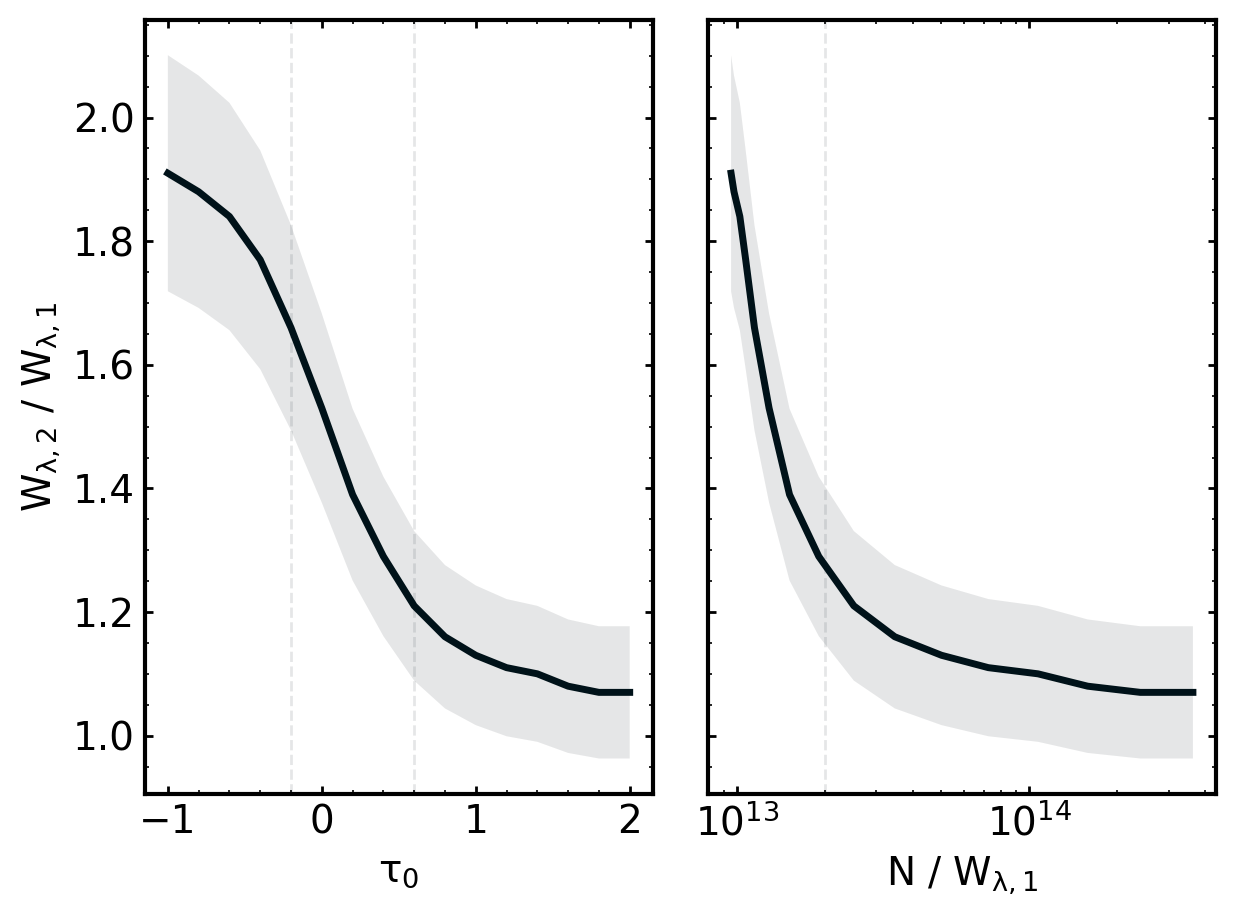

In [17]:
w1_w2 = np.array([1.91, 1.88, 1.84, 1.77, 1.66, 1.53, 1.39, 1.29, 1.21, 1.16, 1.13, 1.11, 1.10, 1.08, 1.07, 1.07])
tau0 = np.array([9-10, 9.2-10, 9.4-10, 9.6-10, 9.8-10, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0])
log_N_w1 = 10**np.array([12.98, 12.99, 13.01, 13.03, 13.06, 13.11, 13.18, 13.28, 13.40, 13.54, 13.70, 13.86, 14.03, 14.20, 14.38, 14.56])

fig, ax = plt.subplots(1, 2,sharey=True)

ax[0].plot(tau0, w1_w2)
ax[0].fill_between(tau0, w1_w2-0.1*w1_w2, w1_w2+0.1*w1_w2, alpha=0.1)
ax[0].set_xlabel(r"$\tau_0$")
ax[0].set_ylabel(r"$W_{\lambda,2}$ / $W_{\lambda,1}$")
ax[0].axvline(-0.2, linestyle="--", alpha=0.1, linewidth=1)
ax[0].axvline(0.6, linestyle="--", alpha=0.1, linewidth=1)

ax[1].plot(log_N_w1, w1_w2)
ax[1].fill_between(log_N_w1, w1_w2-0.1*w1_w2, w1_w2+0.1*w1_w2, alpha=0.1)
ax[1].set_xscale("log")
ax[1].set_xlabel(r"N / W$_{\lambda,1}$")
ax[1].axvline(2e13, linestyle="--", alpha=0.1, linewidth=1)
# ax[1].set_ylabel(r"$W_{\lambda,2}$ / $W_{\lambda,1}$")

fig.savefig("width_fraction_vs_optical_depth.png")